In [1]:
#Q1 Implementation of kNN Neighbour Technique


# Importing the python packages
import pandas as pd
import numpy as np

# Column names for the given table of data
list1 = ['S.No','sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']

# Reading data into pandas dataframe
MD = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',sep=',',names=list1)

# Converting the pandas dataframe to numpy array
MD = MD.to_numpy()

# Length of feature vector
d = MD.shape[1]-1

# No. of classes
c = 3

# Choosing different values of k to check for max accuracy
k_var = [5,6,7,8,9,10,11,12,13,14,15,16,17,18]

# No. of training data samples
n = MD.shape[0]

# No. of training data samples in each class
n1,n2,n3 = 50,50,50

# Initialization of confusion matrix
CM = np.zeros((c,c),dtype='int')

# Adding additional columns to the numpy array to store the predicted class for diff. values of k
for i in range(len(k_var)):
    MD = np.append(MD,np.zeros((n,1)),axis=1)
    
# List of class labels    
list2 = np.array(['Iris-setosa','Iris-versicolor','Iris-virginica'])

# List which store min and max values of feature values
min1 = []
max1 = []

# range1 = max1-min1
range1 = []

# Array which stores the prediction accuracy of each class for diff. values of k 
acc = np.zeros((len(k_var),c))

# Assigning each class label to a unique value i.e., 1,2,3
for i in range(c):
    temp_index= np.where(MD==list2[i])
    MD[temp_index] = i+1

# Normalizing the values of training data to [0,1] using min-max normalization
MD = MD.astype(np.float)
for i in range(d):
    min1.append(np.amin(MD[:,i]))
    max1.append(np.amax(MD[:,i]))
    range1.append(np.amax(MD[:,i])-np.amin(MD[:,i])) 
    MD[:,i] = (MD[:,i]-min1[i])/range1[i]


# Function to normalize the test data samples    
def normalize(test):
    test = np.array(test)
    for i in range(d):
        test[i] = (test[i]-min1[i])/range1[i]
    return test


# Function to calculate Euclidean distance between 2 data samples
def e_distance(arr1,arr2):
    return np.sqrt(np.sum((arr1-arr2)**2))


# Function which returns the predicted label of the test data sample
def kNN_pred(dataset,test,k):
    index_list = []
    kc = []
    class_list = []
    dist = np.zeros(n)
    test = np.array(test).reshape(1,d)
    for i in range(n):
        temp = dataset[i,0:d].reshape(1,d)
        dist[i] = e_distance(temp,test)
    dist_sorted = np.sort(dist)
    dist = dist.tolist()
    for i in range(k):
        ind = dist.index(dist_sorted[i])
        class_list.append(dataset[ind,4])
        index_list.append(ind)    
    for i in range(c):
        kc.append(class_list.count(i+1))
    label = kc.index(max(kc))+1  
    return label   



# Given test data samples
t1 = [5.1,2.5,3.2,4.3]
t2 = [4.9,3,1.4,0.2]
t3 = [6,3,4.8,1.8]


# Predicted labels of the above test samples
label1 = kNN_pred(MD,normalize(t1),5)
label2 = kNN_pred(MD,normalize(t2),5)
label3 = kNN_pred(MD,normalize(t3),5)
print('Test sample1 belongs to class',list2[label1-1])
print('Test sample2 belongs to class',list2[label2-1])
print('Test sample3 belongs to class',list2[label3-1])



# Applying kNN technique on each training data sample to get the predicted class
# labels for different values of k
for i in range(len(k_var)):
    for j in range(n):
        t = MD[j,0:d]
        MD[j,5+i] = kNN_pred(MD,t,k_var[i])
        

# Calculating the confusion matrix of kNN predictor for k=5    
for i in range(n):
    x = int(MD[i,4])
    y = int(MD[i,5])
    CM[x-1,y-1] = CM[x-1,y-1] + 1
index_values1 = ['Actual class1','Actual class2', 'Actual class3']
column_values1 = ['Predicted class1','Predicted class2', 'Predicted class3']
df1 = pd.DataFrame(data=CM,index=index_values1,columns=column_values1)
print('Confusion Matrix of kNN predictor applied on training data set for k=5 is \n',df1)


# Calculation of accuracy of each class for different values of k
for i in range(len(k_var)):    
    for j in range(c):
        temp_list1 = MD[(n1*j):(n1*j)+(n1-1),4]
        temp_list2 = MD[(n1*j):(n1*j)+(n1-1),5+i]
        temp_list = list(temp_list1-temp_list2)
        count1 = temp_list.count(0)
        acc[i,j] = 100*count1/n1
index_values2 = ['k=5','k=6','k=7','k=8','k=9','k=10','k=11','k=12','k=13','k=14','k=15','k=16','k=17','k=18']
column_values2 = ['class1 Accuracy(%)','Class2 Accuracy(%)', 'Class3 Accuracy(%)']
df2 = pd.DataFrame(data=acc,index=index_values2,columns=column_values2)
print('Prediction accuracy of training data of each class for different values of k is as shown below:\n',df2)
print('From the above data, it is clear that the prediction accuracy of each class is maximum at k=9 & 13')

 
print('Apart from Hyperparameter tuning method, the other ways of choosing the optimal values of k is by using:\n','1.Schwarz criterion\n','2.Cross-validation method\n','3.Elbow method')     


Test sample1 belongs to class Iris-virginica
Test sample2 belongs to class Iris-setosa
Test sample3 belongs to class Iris-virginica
Confusion Matrix of kNN predictor applied on training data set for k=5 is 
                Predicted class1  Predicted class2  Predicted class3
Actual class1                50                 0                 0
Actual class2                 0                48                 2
Actual class3                 0                 4                46
Prediction accuracy of training data of each class for different values of k is as shown below:
       class1 Accuracy(%)  Class2 Accuracy(%)  Class3 Accuracy(%)
k=5                 98.0                94.0                90.0
k=6                 98.0                96.0                90.0
k=7                 98.0                96.0                90.0
k=8                 98.0                96.0                90.0
k=9                 98.0                96.0                92.0
k=10                98.0         

From the plots, it is clear that k=4 looks to be more appropriate


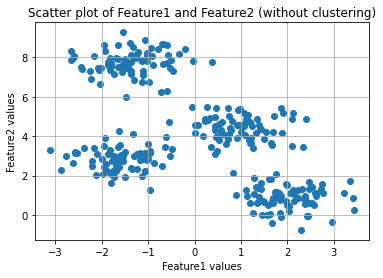

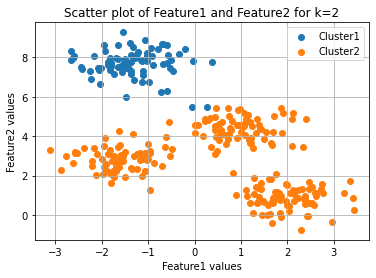

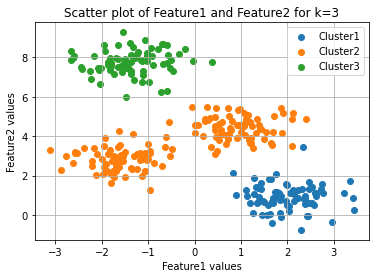

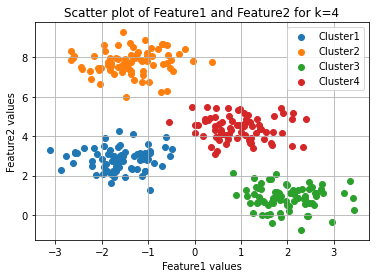

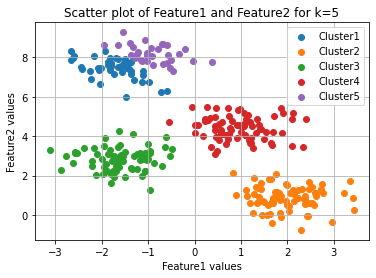

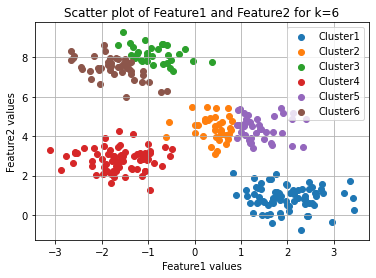

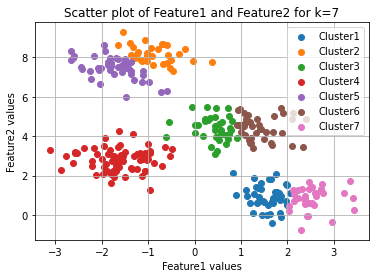

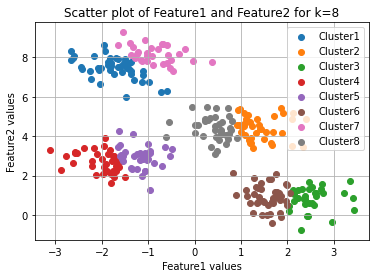

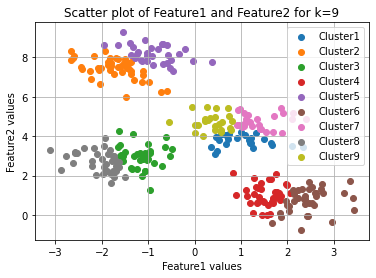

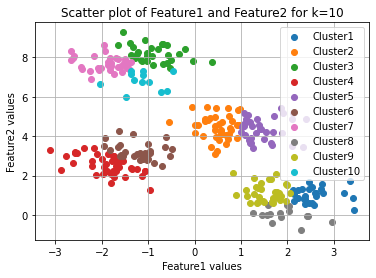

In [2]:
#Q2 Implementation of k-means clustering Technique


# Importing the python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Reading data into pandas dataframe
MD = pd.read_csv('https://raw.githubusercontent.com/snehilsanyal/EE524/master/Assignments/dataset.csv',sep=',')

# Converting the pandas dataframe to numpy array
MD = MD.to_numpy()

# Length of data samples
n = MD.shape[0]

# Extracting the feature data from the master data
x = MD[:,1]
y = MD[:,2]
MD = MD[:,1:3]

# Labels to be used to display the plot legend
labels = ['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5','Cluster6','Cluster7','Cluster8','Cluster9','Cluster10']


# Plotting the given (unclustered) data on scatter plot
plt.figure()
plt.scatter(x,y)
plt.grid()
plt.xlabel('Feature1 values')
plt.ylabel('Feature2 values')
plt.title('Scatter plot of Feature1 and Feature2 (without clustering)')


# Repeating the kmeans algorithm for k values from 2 to 10
for i in range(0,9):
    
    # Deleting the column which has cluster labels of given data samples 
    if i!=0:
        MD = np.delete(MD,2,1)
    k = i+2
    
    # Extracting the cluster label for each data sample by running KMeans algorithm on given data
    clusterNo = KMeans(n_clusters=k).fit_predict(MD).reshape(n,1)
    
    # Appending the cluster labels of given data as a column to the given data
    MD = np.append(MD,clusterNo,axis=1)
    
    # Plotting the data of each cluster using the above cluster labels 
    for j in range(k):
        
        # Extracting data corresponding to each cluster No.
        temp = MD[MD[:,2]==j]
        x = temp[:,0]
        y = temp[:,1]
        if j==0:
            plt.figure()
        plt.scatter(x,y,label=labels[j],marker='o') 
    plt.grid()
    plt.legend()
    plt.xlabel('Feature1 values')
    plt.ylabel('Feature2 values')
    str1 = 'Scatter plot of Feature1 and Feature2 for k=' + str(k) 
    plt.title(str1)
    
print('From the plots, it is clear that k=4 looks to be more appropriate')